## Clinical Text Data Extraction by using Language Models

### Import libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re


In [69]:

from sklearn.feature_extraction.text import Tfifinal_data_categoriesVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE


In [70]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

### Loading data

In [4]:
clinical_text_df = pd.read_csv('mtsamples.csv')

print(clinical_text_df.columns)
clinical_text_df.head(5)

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

### Removing NA values and grouping

In [72]:

clinical_text_df = clinical_text_df[clinical_text_df['transcription'].notna()]
data_categories  = clinical_text_df.groupby(clinical_text_df['medical_specialty'])

In [73]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])

### EDA

In [5]:
clinical_text_df['difference_between_transcription_and_description'] = clinical_text_df['transcription'].str.len() - clinical_text_df['description'].str.len()
clinical_text_df['difference_between_transcription_and_description']

0       1266.0
1       2390.0
2       4381.0
3        472.0
4       1599.0
         ...  
4994    5195.0
4995    1305.0
4996    4462.0
4997    2732.0
4998    4302.0
Name: difference_between_transcription_and_description, Length: 4999, dtype: float64

<Axes: xlabel='difference_between_transcription_and_description', ylabel='Count'>

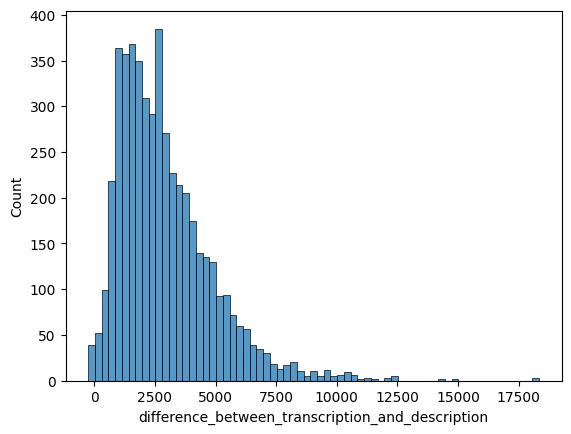

In [6]:
sns.histplot(clinical_text_df['difference_between_transcription_and_description'])

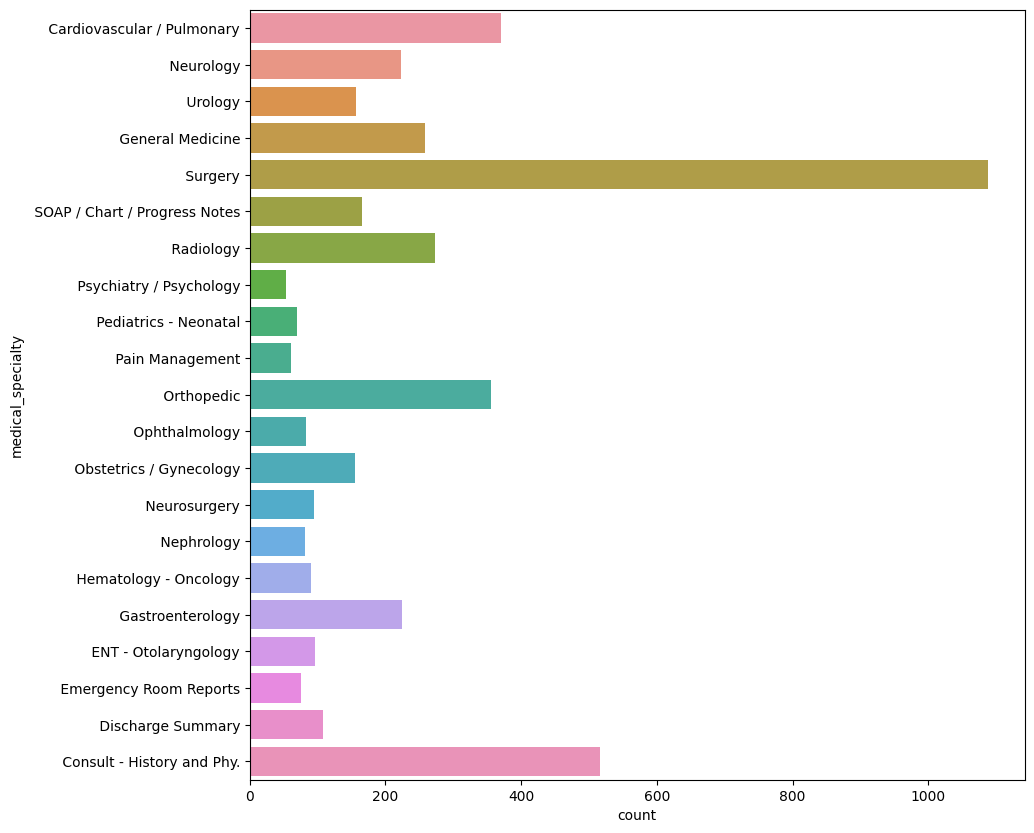

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = filtered_data_categories )
plt.show()

In [75]:
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape


(4597, 2)

In [76]:
print('Sample Transcription:', data['transcription'][4])


Sample Transcription: 1.  The left ventricular cavity size and wall thickness appear normal.  The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%.  There is near-cavity obliteration seen.  There also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function.  There is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by Doppler examination.,2.  The left atrium appears mildly dilated.,3.  The right atrium and right ventricle appear normal.,4.  The aortic root appears normal.,5.  The aortic valve appears calcified with mild aortic valve stenosis, calculated aortic valve area is 1.3 cm square with a maximum instantaneous gradient of 34 and a mean gradient of 19 mm.,6.  There is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral v

### Text Preprocessing: Cleaning By Regex and Lemmatizing text

In [77]:
def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2)
    return text2


In [78]:

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist) 


In [79]:

data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)

In [80]:
print('Sample Transcription:', data['transcription'][4])


Sample Transcription:   there is a color doppler suggestive of a patent foramen ovale with lipomatous hypertrophy of the interatrial septum 


### Term Frequency -Inverse Document Frequency to extract Tf-Ifinal_data_categories features from the transcription

In [81]:
vectorizer = Tfifinal_data_categoriesVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_final_data_categories=0.75, use_ifinal_data_categories=True, smooth_ifinal_data_categories=True, max_features=1000)
tfIfinal_data_categoriesMat  = vectorizer.fit_transform(data['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['abc', 'abcd', 'abdomen', 'abdomen pelvis', 'abdominal', 'abdominal pain', 'abnormal', 'abscess', 'activity', 'acute', 'additional', 'adenocarcinoma', 'adequate', 'administered', 'admission', 'admitted', 'admitting', 'africanamerican', 'age', 'ago', 'airway', 'alcohol', 'anemia', 'anesthesia', 'anesthesia care', 'anesthesia general', 'anesthesia general endotracheal', 'anesthesia local', 'anesthetic', 'angina', 'angiography', 'ankle', 'anterior', 'antibiotic', 'aortic', 'apnea', 'apparent', 'appendicitis', 'applied', 'appointment', 'appropriate', 'approximately', 'area', 'arm', 'artery', 'artery disease', 'arthritis', 'arthroplasty', 'asked', 'aspect', 'aspiration', 'assessment', 'associated', 'atrial', 'atrial fibrillation', 'awakened', 'axial', 'axial ct', 'axial ct image', 'axis', 'baby', 'base', 'benefit', 'benign', 'better', 'bid', 'bilateral', 'bilaterally', 'biopsy', 'bladder', 'bleeding', 'block', 'blood', 'blood loss', 'blood loss cc', 'blood loss minimal', 'blood loss ml', '

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Using TSNE to convert a high Dimension data to 2-D

In [82]:
tfIfinal_data_categoriesMatrix = tfIfinal_data_categoriesMat.todense()
labels = data['medical_specialty'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIfinal_data_categoriesMatrix)
plt.figure(figsize=(16,10))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

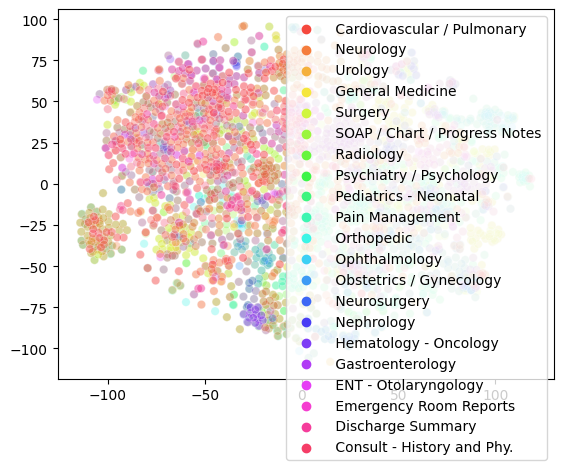

In [83]:

palette = sns.hls_palette(21, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()


### Applying PCA for dimensionality reduction

In [84]:
pca = PCA(n_components=0.95)
tfIfinal_data_categoriesMat_reduced = pca.fit_transform(tfIfinal_data_categoriesMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIfinal_data_categoriesMat_reduced, labels, stratify=labels,random_state=1)   


In [85]:
print('Train_Set_Size:',str(X_train.shape))
print('Test_Set_Size:',str(X_test.shape))

Train_Set_Size: (3447, 587)
Test_Set_Size: (1150, 587)


### Using Logistic Regression with elasticnet as the penalty to consider both the Lasso and ridge regularization

In [86]:
lr = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.001, random_state=100).fit(X_train, y_train)
y_test_pred= lr.predict(X_test)

### Plotting Confusion Matrix

In [87]:
labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels = labels)

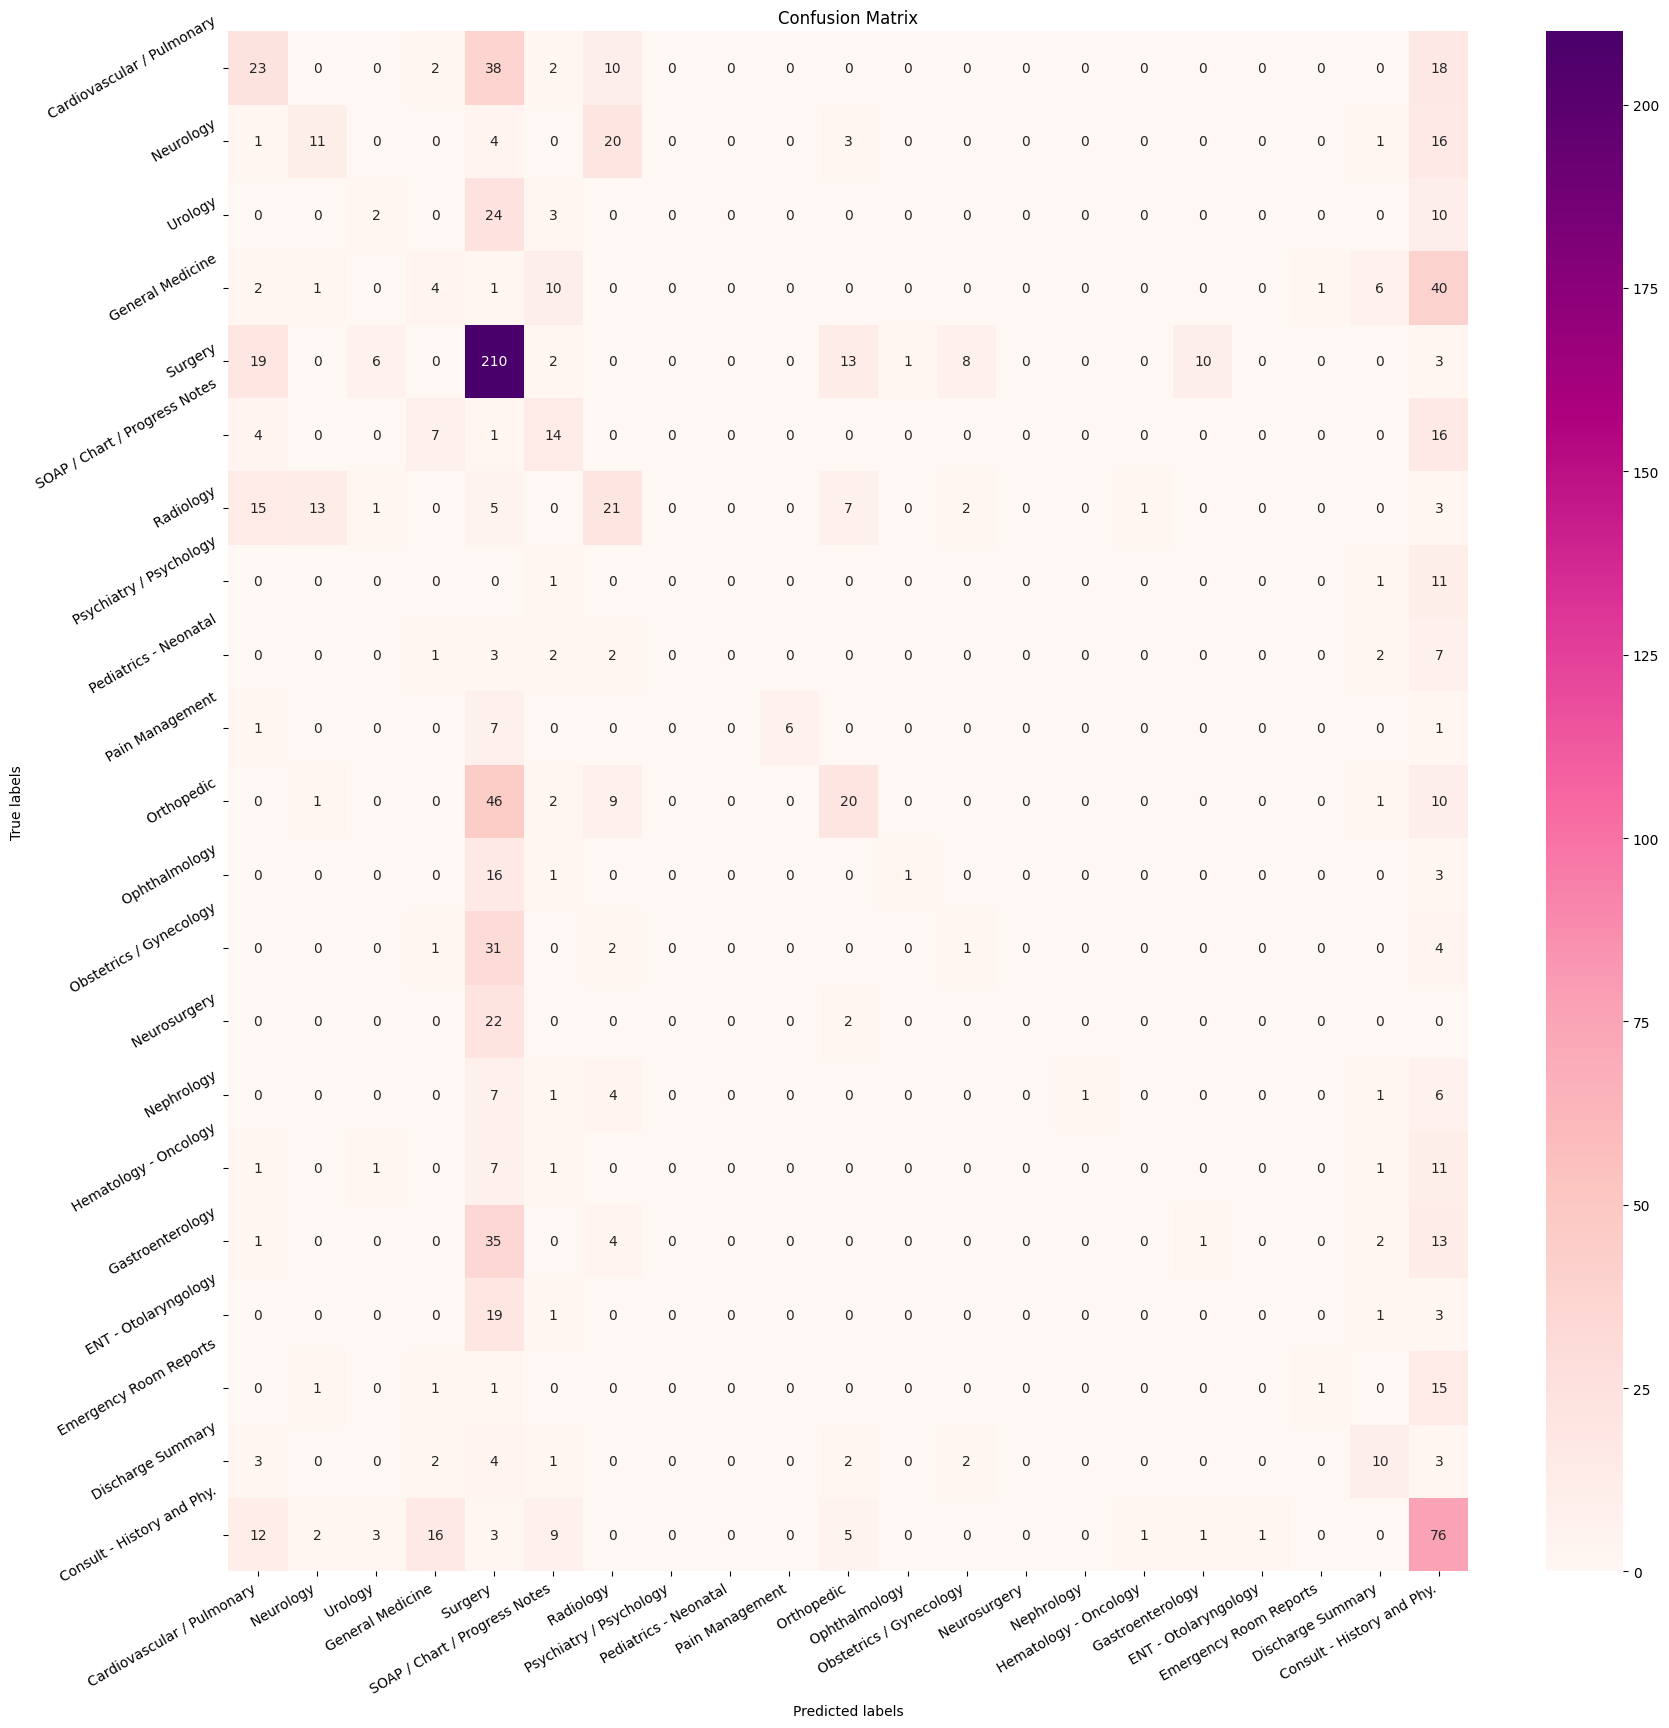

In [88]:

fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="RdPu",ax = ax,fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

## Obtained Classification Report

In [89]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.28      0.25      0.26        93
                     Neurology       0.38      0.20      0.26        56
                       Urology       0.15      0.05      0.08        39
              General Medicine       0.12      0.06      0.08        65
                       Surgery       0.43      0.77      0.56       272
 SOAP / Chart / Progress Notes       0.28      0.33      0.30        42
                     Radiology       0.29      0.31      0.30        68
       Psychiatry / Psychology       0.00      0.00      0.00        13
         Pediatrics - Neonatal       0.00      0.00      0.00        17
               Pain Management       1.00      0.40      0.57        15
                    Orthopedic       0.38      0.22      0.28        89
                 Ophthalmology       0.50      0.05      0.09        21
       Obstetrics / Gynecology       0.08      0.03      0.04  

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

The accuracy obtained is 35%. it is a low accuracy for the reason that the data was highly imbalanced with Surgery being the most frequent class in the data. The accuracy can be increased by applying some domain knowledge by consulting to SMEs and selecting only a few classes. To tackle the imabalance in the data bethods such as Synthetic Minority OverSampling technique, Oversampling of minority data can be employed to better the accuracy

In [90]:
X_test[0]

array([-2.08161887e-01,  4.19025270e-01, -7.14932733e-02, -6.87183748e-03,
        3.57576325e-02, -6.93643558e-02, -8.50025886e-03,  1.74734204e-02,
       -1.25135246e-01, -2.79729231e-02, -4.65436312e-02,  1.55890116e-02,
        3.42871896e-02, -7.33436679e-02,  2.80642472e-02,  7.55991795e-03,
       -4.23858161e-02, -5.47310286e-02, -1.54942975e-02, -1.42574003e-02,
        4.41383601e-03, -3.16412381e-02, -5.37294583e-02, -1.17179949e-02,
       -6.66255294e-02, -8.13485194e-03,  2.57873646e-02,  2.51257906e-02,
        3.56886191e-02,  3.45370774e-04, -3.60699796e-02, -2.60119434e-02,
       -1.88692783e-02, -4.84537662e-02,  2.16242026e-02, -1.69608588e-03,
        2.81190091e-02,  1.25944962e-03,  6.91897612e-03,  2.43401814e-02,
       -1.29622005e-03, -1.82825314e-02, -5.01923551e-02, -1.71215978e-03,
       -2.23944111e-03,  2.77351092e-02, -2.57190161e-02,  3.88225451e-02,
        2.91109911e-02, -1.55794334e-02, -4.42228555e-03, -2.37160740e-02,
       -1.62973074e-03, -

In [91]:
lr.predict(X_test[100].reshape(1,-1))

array([' Consult - History and Phy.'], dtype='<U30')

In [92]:
from imblearn.over_sampling import SMOTE
smote_over_sample = SMOTE(sampling_strategy='minority')
labels = data['medical_specialty'].tolist()
X, y = smote_over_sample.fit_resample(tfIfinal_data_categoriesMat_reduced, labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)   
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(4224, 587)
Test_Set_Size:(1408, 587)


In [93]:
lr = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.001, random_state=100).fit(X_train, y_train)
y_test_pred= lr.predict(X_test)

In [94]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.35      0.22      0.27        93
                     Neurology       0.37      0.20      0.26        56
                       Urology       0.10      0.03      0.04        39
              General Medicine       0.17      0.08      0.11        65
                       Surgery       0.44      0.78      0.56       272
 SOAP / Chart / Progress Notes       0.21      0.22      0.22        41
                     Radiology       0.29      0.34      0.31        68
       Psychiatry / Psychology       0.84      1.00      0.91       272
         Pediatrics - Neonatal       0.00      0.00      0.00        17
               Pain Management       0.71      0.33      0.45        15
                    Orthopedic       0.31      0.18      0.23        89
                 Ophthalmology       0.25      0.05      0.08        21
       Obstetrics / Gynecology       0.00      0.00      0.00  

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

As we can see that the accuracy has significanylt increased after applying SMOTE over the imbalanced data

## Using en_ner_bc5cdr_md - A scispacy model

In [55]:
from spacy.matcher import Matcher

def extraction(model, doc):
    print("TEXT", "START", "END", "ENTITY TYPE")
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    pattern = [{'ENT_TYPE':'CHEMICAL'}, {'LIKE_NUM': True}, {'IS_ASCII': True}]
    matcher = Matcher(model.vocab)
    matcher.add("DRUG_DOSE", [pattern])
    for transcription in clinical_text_df['transcription']:
        doc = model(transcription)
        matches = matcher(doc)
        for match_id, start, end in matches:
            string_id = model.vocab.strings[match_id]
            span = doc[start:end]
            print(span.text, start, end, string_id,)
            for ent in doc.ents:
                # Can be returned in a json format for API use
                print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [56]:
from spacy import displacy
import en_ner_bc5cdr_md
scispacy_medical = en_ner_bc5cdr_md.load()
doc = scispacy_medical(clinical_text_df['transcription'][0])
displacy_image = displacy.render(doc, jupyter=True,style='ent')
extraction(scispacy_medical, doc)

TEXT START END ENTITY TYPE
complaint of allergies 58 80 DISEASE
allergies 100 109 DISEASE
Claritin 200 208 CHEMICAL
Zyrtec 214 220 CHEMICAL
asthma 520 526 DISEASE
Tri-Cyclen 666 676 CHEMICAL
throat 825 831 DISEASE
Allergic 1028 1036 DISEASE
Zyrtec 1070 1076 CHEMICAL
loratadine 1134 1144 CHEMICAL
Nasonex 1237 1244 CHEMICAL
Nasonex two sprays 236 239 DRUG_DOSE
complaint of allergies 58 80 DISEASE
allergies 100 109 DISEASE
Claritin 200 208 CHEMICAL
Zyrtec 214 220 CHEMICAL
asthma 520 526 DISEASE
Tri-Cyclen 666 676 CHEMICAL
throat 825 831 DISEASE
Allergic 1028 1036 DISEASE
Zyrtec 1070 1076 CHEMICAL
loratadine 1134 1144 CHEMICAL
Nasonex 1237 1244 CHEMICAL
alcohol ten to 319 322 DRUG_DOSE
weight loss 302 313 DISEASE
weight loss 597 608 DISEASE
alcohol 707 714 CHEMICAL
weight loss 784 795 DISEASE
cholesterol 1050 1061 CHEMICAL
asthma 1096 1102 DISEASE
apnea 1180 1185 DISEASE
snoring 1190 1197 DISEASE
diabetic 1208 1216 DISEASE
pain 1247 1251 DISEASE
knee pain 1253 1262 DISEASE
pain 1269 1273 D

Here the pretrained model can been accuractely classifying the pertinent words along with the entities. Hence this can be a reliable method for ectracting clinical data from a given medicaltext